In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [85]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## TAHAP EDA

In [86]:
# Menampilkan informasi dasar tentang dataset
print("\n=== Informasi Dataset ===")
print("\nBeberapa baris pertama dataset:")
print(df.head())


=== Informasi Dataset ===

Beberapa baris pertama dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [87]:
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [88]:
print("\nStatistik Dasar:")
df.describe()


Statistik Dasar:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [89]:
# Memeriksa nilai yang hilang
print("\nNilai yang Hilang:")
df.isnull().sum()


Nilai yang Hilang:


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## TAHAPAN VISUALISASI

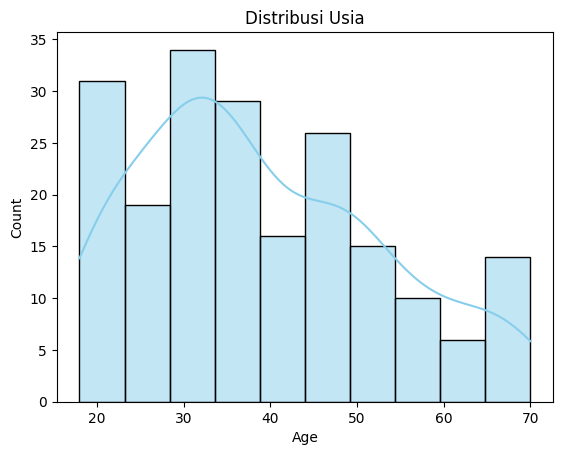

In [90]:
# Usia
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title("Distribusi Usia")
plt.show()

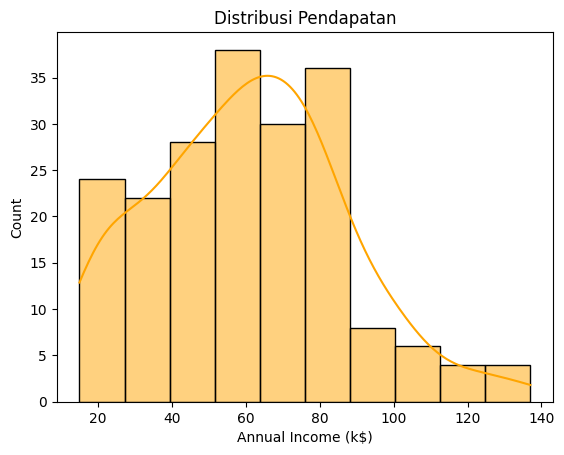

In [91]:
# Pendapatan
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True, color='orange')
plt.title("Distribusi Pendapatan")
plt.show()

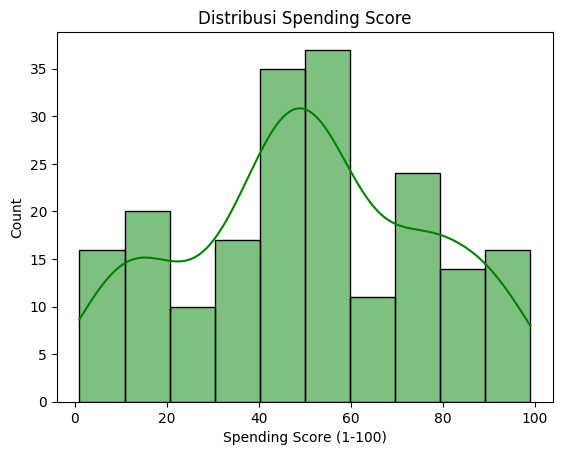

In [92]:
# Skor Belanja
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True, color='green')
plt.title("Distribusi Spending Score")
plt.show()

Text(0.5, 1.0, 'Distribusi Jenis Kelamin')

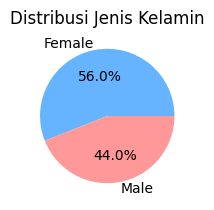

In [93]:
# Distribusi Jenis Kelamin (warna lebih bagus)
plt.subplot(2, 2, 4)
gender_counts = df['Genre'].value_counts()
colors = ['#66b3ff', '#ff9999']  # Biru muda & merah muda
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribusi Jenis Kelamin')

## VISUALISASI PERSEBARAN

In [95]:
plt.figure(figsize=(15, 4))

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

Text(0, 0.5, 'Pendapatan Tahunan (k$)')

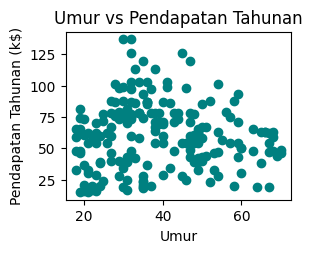

In [96]:
# 1. Umur vs Pendapatan Tahunan
plt.subplot(2, 2, 1)
plt.scatter(df['Age'], df['Annual Income (k$)'], color='teal')
plt.title('Umur vs Pendapatan Tahunan')
plt.xlabel('Umur')
plt.ylabel('Pendapatan Tahunan (k$)')

Text(0, 0.5, 'Skor Pengeluaran')

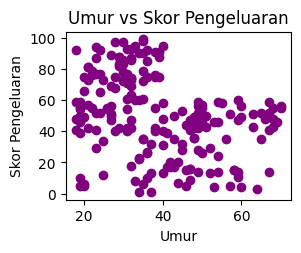

In [97]:
#Visualisasi Umur vs Skor Pengeluaran
plt.subplot(2, 2, 2)
plt.scatter(df['Age'], df['Spending Score (1-100)'], color='purple')
plt.title('Umur vs Skor Pengeluaran')
plt.xlabel('Umur')
plt.ylabel('Skor Pengeluaran')

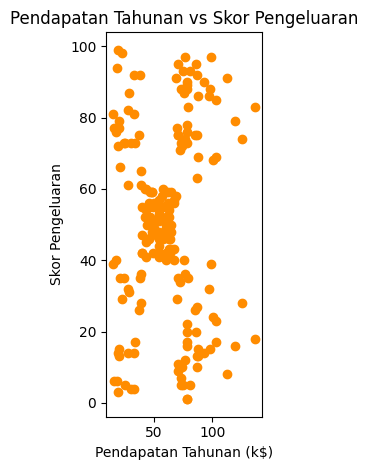

In [98]:
# 3. Pendapatan Tahunan vs Skor Pengeluaran
plt.subplot(1, 3, 3)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='darkorange')
plt.title('Pendapatan Tahunan vs Skor Pengeluaran')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran')

plt.tight_layout()
plt.show()

## PREPROCESING DATA

In [100]:
# Menghapus duplikat jika ada
df = df.drop_duplicates()

In [101]:
# Feature Engineering
print("\n=== Tahap 4: Feature Engineering ===")
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 100], labels=['0-20', '21-30', '31-40', '41-50', '50+'])
df['IncomeGroup'] = pd.qcut(df['Annual Income (k$)'], q=4, labels=['Rendah', 'Menengah', 'Tinggi', 'Sangat Tinggi'])
df['SpendingGroup'] = pd.qcut(df['Spending Score (1-100)'], q=4, labels=['Rendah', 'Menengah', 'Tinggi', 'Sangat Tinggi'])
print("\nData setelah feature engineering:")
print(df.head())


=== Tahap 4: Feature Engineering ===

Data setelah feature engineering:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  AgeGroup IncomeGroup  SpendingGroup  
0     0-20      Rendah       Menengah  
1    21-30      Rendah  Sangat Tinggi  
2     0-20      Rendah         Rendah  
3    21-30      Rendah  Sangat Tinggi  
4    31-40      Rendah       Menengah  


In [104]:
#Encoding Kategorikal
print("\n=== Tahap 5: Encoding Kategorikal ===")
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Genre'])
df = pd.get_dummies(df, columns=['AgeGroup'], prefix='AgeGroup')
df = pd.get_dummies(df, columns=['IncomeGroup'], prefix='IncomeGroup')
df = pd.get_dummies(df, columns=['SpendingGroup'], prefix='SpendingGroup')
print("\nData setelah encoding:")
print(df.head())


=== Tahap 5: Encoding Kategorikal ===

Data setelah encoding:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Gender_Encoded  AgeGroup_0-20  AgeGroup_21-30  AgeGroup_31-40  \
0               1           True           False           False   
1               1          False            True           False   
2               0           True           False           False   
3               0          False            True           False   
4               0          False           False            True   

   AgeGroup_41-50  AgeGroup_50+  IncomeGroup_Rendah  IncomeGroup_Menengah  \
0     

In [105]:
# Normalisasi Data Numerik
print("\n=== Tahap 6: Normalisasi Data Numerik ===")
kolom_numerik = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])
print("\nData setelah normalisasi:")
print(df[kolom_numerik].head())


=== Tahap 6: Normalisasi Data Numerik ===

Data setelah normalisasi:
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980



=== Tahap 7: Visualisasi Data yang Sudah Diproses ===


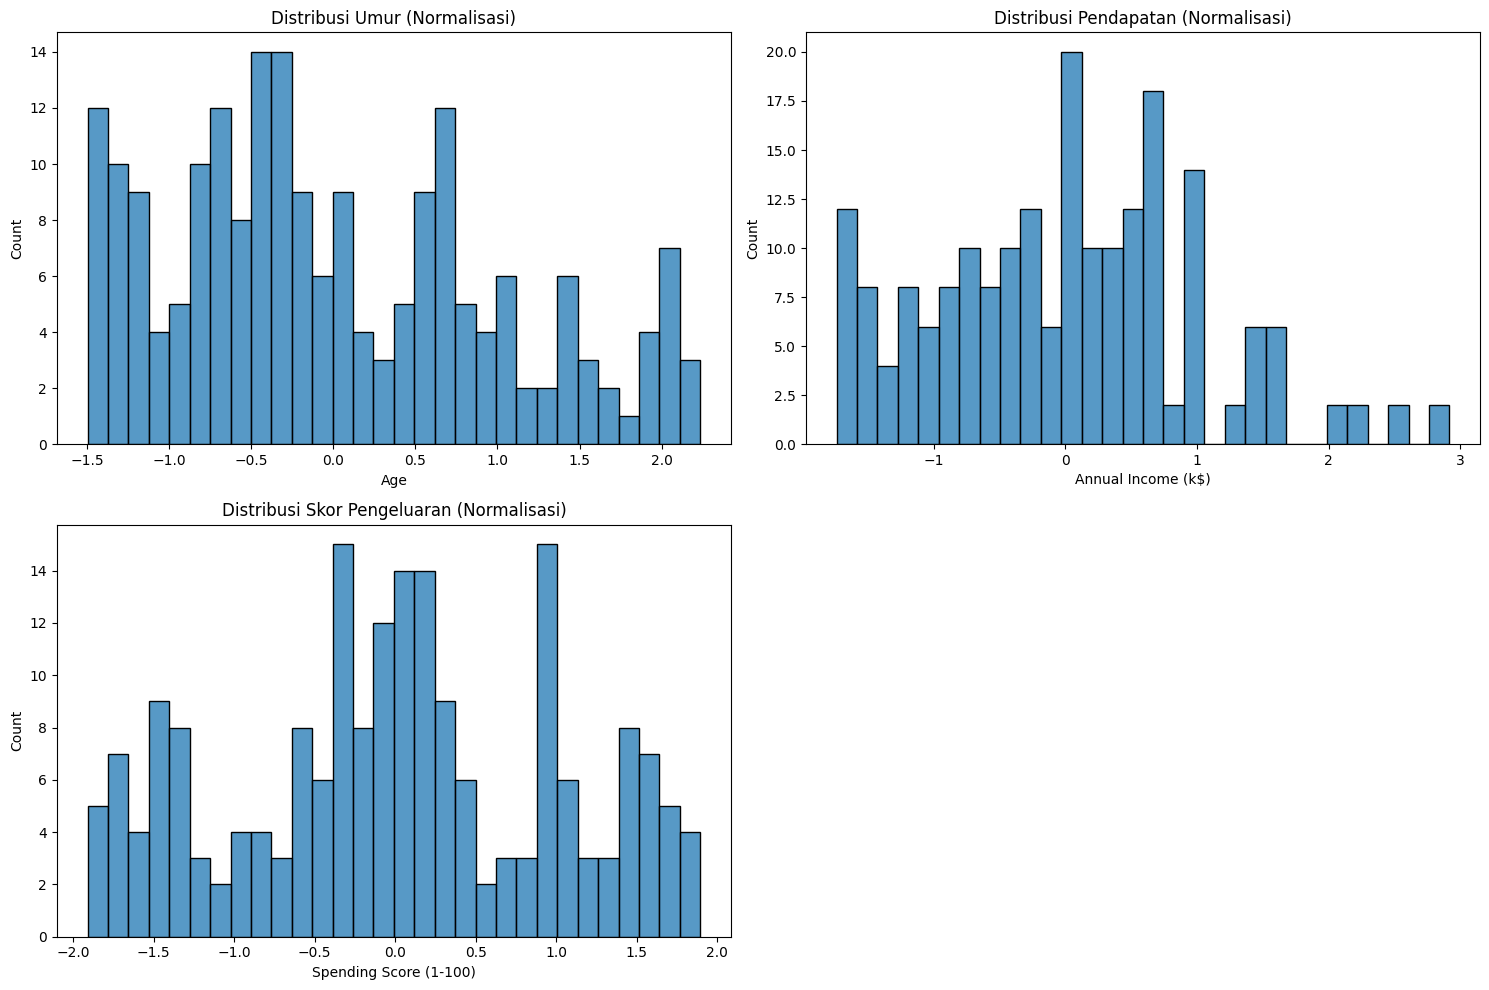

In [106]:
# Visualisasi Data yang Sudah Diproses
print("\n=== Tahap 7: Visualisasi Data yang Sudah Diproses ===")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', bins=30)
plt.title('Distribusi Umur (Normalisasi)')
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Annual Income (k$)', bins=30)
plt.title('Distribusi Pendapatan (Normalisasi)')
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Spending Score (1-100)', bins=30)
plt.title('Distribusi Skor Pengeluaran (Normalisasi)')
plt.tight_layout()
plt.show()


In [107]:
# 8. Menyimpan Data yang Sudah Diproses
print("\n=== Tahap 8: Menyimpan Data yang Sudah Diproses ===")
df.to_csv('Mall_Customers_Processed.csv', index=False)
print("\nData yang sudah diproses telah disimpan ke 'Mall_Customers_Processed.csv'")



=== Tahap 8: Menyimpan Data yang Sudah Diproses ===

Data yang sudah diproses telah disimpan ke 'Mall_Customers_Processed.csv'


In [108]:
# Ringkasan Preprocessing
print("\n=== Tahap 9: Ringkasan Preprocessing ===")
print("\nKolom yang tersedia setelah preprocessing:")
print(df.columns.tolist())
print("\nBentuk data akhir:")
print(df.shape)

with open('ringkasan_preprocessing.txt', 'w') as f:
    f.write("=== Ringkasan Preprocessing Data Mall Customers ===\n\n")
    f.write("1. Jumlah baris dan kolom akhir: {}\n".format(df.shape))
    f.write("2. Kolom yang tersedia:\n")
    for col in df.columns:
        f.write(f"   - {col}\n")
    f.write("\n3. Statistik deskriptif data numerik:\n")
    f.write(str(df[kolom_numerik].describe()))
    f.write("\n\n4. Informasi tentang encoding:\n")
    f.write("   - Gender telah di-encode menggunakan Label Encoding\n")
    f.write("   - AgeGroup, IncomeGroup, dan SpendingGroup telah di-encode menggunakan One-Hot Encoding\n")
    f.write("\n5. Data numerik telah dinormalisasi menggunakan StandardScaler")


=== Tahap 9: Ringkasan Preprocessing ===

Kolom yang tersedia setelah preprocessing:
['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Encoded', 'AgeGroup_0-20', 'AgeGroup_21-30', 'AgeGroup_31-40', 'AgeGroup_41-50', 'AgeGroup_50+', 'IncomeGroup_Rendah', 'IncomeGroup_Menengah', 'IncomeGroup_Tinggi', 'IncomeGroup_Sangat Tinggi', 'SpendingGroup_Rendah', 'SpendingGroup_Menengah', 'SpendingGroup_Tinggi', 'SpendingGroup_Sangat Tinggi']

Bentuk data akhir:
(200, 19)
